<a href="https://colab.research.google.com/github/JaneeshaJ2001/DataStorm-5.0-Storming-Round/blob/main/Data_Storm_5_0_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train_kaggle.csv/train_kaggle.csv')
df

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4
...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.4,3893.4,3448.44,3
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3


In [ ]:
df.shape

(774155, 6)

#Data Pre-Processing

## Missing value analysis

In [ ]:
print('Number of missing values per column - training :\n')
df.isna().sum()

Number of missing values per column - training :



Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

- Since Customer_ID is not required for clustering, can apply dummy customer_ID.
- outlet_city 2 missing values can be dropped or imputed with mode
- Missing values in luxury_sales, fresh_sales and dry_sales can be imputed with 0 (missing values indicate no purchase by customer) or can drop those values.
- Drop the cluster_category missing value

In [ ]:
print('Percentage of missing values per column : \n')
null_percentage=(df.isna().sum()/df.size)*100
null_percentage

Percentage of missing values per column : 



Customer_ID         0.000043
outlet_city         0.000043
luxury_sales        0.000754
fresh_sales         0.000883
dry_sales           0.000646
cluster_catgeory    0.000022
dtype: float64

In [ ]:
df.Customer_ID.nunique()

774153

There're 774155 total customers in training set and found there're 2 missing values. Unique count is 774153, means no duplicates in the Customer_ID column.

In [ ]:
df.outlet_city.value_counts().sort_values(ascending=False)

outlet_city
Colombo                   41031
Batticaloa                41012
Galle                     41010
Kalmunai                  40711
Negombo                   40703
Jaffna                    40675
Katunayake                40649
Kandy                     40534
Trincomalee               40528
Gampaha                   40252
Peliyagoda                37151
Nuwara Eliya              37102
Dehiwala-Mount Lavinia    36839
Kotte                     36788
Panadura                  36726
Wattala                   36721
Kaduwela                  36695
Homagama                  36639
Moratuwa                  36417
Kelaniya                  35970
Name: count, dtype: int64

It's difficult to impute the 2 mssing entries in outlet_city column with mode, becauze all stores behave almost same manner. So drop these 2 records.

Let's check missing values in luxury_sales, fresh_sales and dry_sales.

In [ ]:
df.query('luxury_sales.isnull()')

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
4234,10101878.0,Dehiwala-Mount Lavinia,NaN,1686.36,9556.04,4
4333,10361798.0,Kotte,NaN,NaN,6589.44,4
5375,10556752.0,Moratuwa,NaN,1328.88,7751.8,4
5408,10321643.0,Peliyagoda,NaN,NaN,3630.09,4
78367,10424117.0,Kotte,NaN,NaN,3472.08,4
78380,10343473.0,Peliyagoda,NaN,NaN,7337.4,4
174628,10207785.0,Kelaniya,NaN,9322.5,2683.75,2
327258,10615996.0,Kelaniya,NaN,8554.92,2073.92,2
327259,10346205.0,Dehiwala-Mount Lavinia,NaN,4391.1,940.95,2
327260,10722463.0,Nuwara Eliya,NaN,5384.92,1425.42,2


In [ ]:
df.loc[df.luxury_sales.isnull()].cluster_catgeory.value_counts()

cluster_catgeory
5    8
1    7
4    6
3    6
2    5
6    3
Name: count, dtype: int64

In [ ]:
df.query('fresh_sales.isnull()')

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
4326,10531406.0,Kaduwela,925.8,NaN,4011.8,4
4327,10311229.0,Panadura,2374,NaN,7715.5,4
4333,10361798.0,Kotte,NaN,NaN,6589.44,4
4929,10414692.0,Kaduwela,1780.8,NaN,NaN,4
5379,10600529.0,Wattala,1405.4,NaN,4637.82,4
5403,10484539.0,Peliyagoda,1167.2,NaN,4085.2,4
5408,10321643.0,Peliyagoda,NaN,NaN,3630.09,4
78367,10424117.0,Kotte,NaN,NaN,3472.08,4
78380,10343473.0,Peliyagoda,NaN,NaN,7337.4,4
78400,10504943.0,Moratuwa,2312.16,NaN,NaN,4


In [ ]:
df.loc[df.fresh_sales.isnull()].cluster_catgeory.value_counts()

cluster_catgeory
4      10
1       9
6.0     8
3       7
5       4
2       3
Name: count, dtype: int64

In [ ]:
df.query('dry_sales.isnull()')

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
4929,10414692.0,Kaduwela,1780.8,NaN,NaN,4
78400,10504943.0,Moratuwa,2312.16,NaN,NaN,4
327168,10649653.0,Kotte,626.16,3548.24,NaN,2
327169,10737280.0,Nuwara Eliya,820.2,5741.4,NaN,2
327170,10010850.0,Peliyagoda,1059.96,6456.12,NaN,2
327171,10347930.0,Homagama,1216.8,5353.92,NaN,2
327172,10351890.0,Wattala,1817.2,8826.4,NaN,2
327173,10025449.0,Nuwara Eliya,1341.72,7491.27,NaN,2
327174,10638161.0,Peliyagoda,1033.2,5018.4,NaN,2
329931,10540582.0,Kaduwela,3139.06,NaN,NaN,5


In [ ]:
df.loc[df.dry_sales.isnull()].cluster_catgeory.value_counts()

cluster_catgeory
1    10
2     7
3     6
5     5
4     2
Name: count, dtype: int64

In [ ]:
df.query('luxury_sales.isnull() & fresh_sales.isnull() & dry_sales.isnull()')

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory


Every customer has atleast purchase one kind of sales from the stores.

## Data cleaning - Missing values

In [ ]:
df.dropna(subset=['outlet_city', 'cluster_catgeory', 'luxury_sales', 'fresh_sales', 'dry_sales'], inplace=True)

Create dummy customer IDs for missing ones.

In [ ]:
df.query('Customer_ID.isnull()')

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
497678,NaN,Trincomalee,1682.2,2588.0,8411.0,1
497698,NaN,Jaffna,807.82,1118.52,4039.1,1


In [ ]:
print('Last customer ID : ', df.Customer_ID.max())

Last customer ID :  10774154.0


In [ ]:
for idx in df.loc[df.Customer_ID.isnull()].index:
  new_ID = df.Customer_ID.max() + 1
  print(f'Row {idx} allocated Customer_ID is {new_ID}')
  df.loc[idx, 'Customer_ID'] = new_ID

Row 497678 allocated Customer_ID is 10774155.0
Row 497698 allocated Customer_ID is 10774156.0


In [ ]:
df.isna().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

Now all the missing values are handled in the data set.

Let's analyze the cluster_category column.

In [ ]:
df['cluster_catgeory'].unique()

array(['4', '1', '99', '2', '5', '3', '6', '6\\', 4, 2, 1, 95, 3, 98, 5,
       6, 100.0, 89.0], dtype=object)

In [ ]:
df['cluster_catgeory'] = df['cluster_catgeory'].replace('6\\', 6)

In [ ]:
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

In [ ]:
df['cluster_catgeory'].unique()

array([  4,   1,  99,   2,   5,   3,   6,  95,  98, 100,  89])

The description said there're only 6 clusters, so remove the irrleavant items from the data set.

In [ ]:
df = df.loc[df.cluster_catgeory <= 6]

In [ ]:
df.describe(include=object)

,outlet_city,luxury_sales,fresh_sales,dry_sales
count,774147,774147,774147,774147
unique,20,143898,257031,270132
top,Colombo,1029.6,0,0
freq,41031,62,41,30


Luxury_sales, fresh_sales, dry_sales columns include non-float values, So first find those values.

In [ ]:
# Extract rows where conversion to float fails
invalid_rows = df[pd.to_numeric(df['luxury_sales'], errors='coerce').isna()]
print(invalid_rows.to_string())

        Customer_ID   outlet_city                         luxury_sales fresh_sales dry_sales  cluster_catgeory
80043    10774052.0      Kelaniya    One thousand four hundread ruppes      1118.0    5934.0                 4
175278   10347733.0    Peliyagoda                                  nul     4286.28       nul                 2
296621   10215937.0      Panadura                                  nul     8155.11       nul                 2
297911   10189925.0      Kelaniya               Eight hundread ruppess     4003.84   1059.84                 2
326593   10467590.0  Nuwara Eliya              six hundread and hirty       3420.3    894.54                 2
367935   10445384.0         Galle                                  nul     1919.13   7563.63                 2
497177   10537755.0         Kandy               Thousand tow hundread       2041.0    6939.4                 1
497245   10468127.0         Kandy      seven hundread and nine ruppees     1032.48   4194.45                 1
5

In [ ]:
invalid_rows = df[pd.to_numeric(df['fresh_sales'], errors='coerce').isna()]
print(invalid_rows.to_string())

        Customer_ID   outlet_city luxury_sales                          fresh_sales dry_sales  cluster_catgeory
161810   10261075.0      Panadura       887.36         Six hundread and five ruppes    3604.9                 4
174714   10358037.0  Nuwara Eliya      1012.34                                  nul    1446.2                 2
268571   10047014.0      Panadura       1808.3                                  nul       nul                 2
326334   10006007.0      Kaduwela       758.52     Three thousana and five hundread   1029.42                 2
327495   10099173.0       Wattala      1303.92                                  nul       nul                 2
327505   10312003.0      Kaduwela      1303.06                                  nul       nul                 2
558897   10314616.0    Batticaloa      3027.36             thirteen thousand ruppes   2081.31                 6
752816   10369123.0   Trincomalee      5501.57                 Five thousand ruppes   5679.04           

In [ ]:
invalid_rows = df[pd.to_numeric(df['dry_sales'], errors='coerce').isna()]
print(invalid_rows.to_string())

        Customer_ID             outlet_city luxury_sales fresh_sales                              dry_sales  cluster_catgeory
148029   10190107.0  Dehiwala-Mount Lavinia        931.5       931.5  Four thousand and two hundread ruppes                 4
174631   10273730.0                Homagama      1074.36     5141.58                                    nul                 2
174720   10039004.0                Kaduwela       944.44      4722.2                                    nul                 2
175278   10347733.0              Peliyagoda          nul     4286.28                                    nul                 2
268571   10047014.0                Panadura       1808.3         nul                                    nul                 2
296621   10215937.0                Panadura          nul     8155.11                                    nul                 2
327495   10099173.0                 Wattala      1303.92         nul                                    nul           

In [ ]:
df['luxury_sales'] = df['luxury_sales'].replace({'One thousand four hundread ruppes': 1400, 'Eight hundread ruppess': 800,
                                                 'six hundread and hirty ': 630, 'Thousand tow hundread ': 1200,
                                                 'seven hundread and nine ruppees': 709, 'Three thousand two hundread ruppess': 3200,
                                                 'Four thousand one hundread ruppess': 4100})
df['fresh_sales'] = df['fresh_sales'].replace({'Six hundread and five ruppes': 605, 'Three thousana and five hundread': 3500,
                                               'thirteen thousand ruppes': 3000, 'Five thousand ruppes': 5000,
                                               'Two thousand seven hundread ruppess': 2700})
df['dry_sales'] = df['dry_sales'].replace({'Four thousand and two hundread ruppes': 4200})

In [ ]:
df = df.replace('nul',np.nan)

In [ ]:
# Drop rows where any column has NaN values
df.dropna(inplace=True)

In [ ]:
df['luxury_sales'] = df['luxury_sales'].astype(float)
df['fresh_sales'] = df['fresh_sales'].astype(float)
df['dry_sales'] = df['dry_sales'].astype(float)

In [ ]:
df.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,7.740490e+05,774049.000000,774049.000000,774049.000000,774049.000000
mean,1.038708e+07,1921.947797,4428.701160,4676.292337,3.292143
std,2.234822e+05,1004.042819,3334.723549,3409.411266,1.867038
min,1.000000e+07,500.000000,500.000000,500.000000,1.000000
25%,1.019353e+07,1213.530000,1620.130000,1787.940000,2.000000
50%,1.038708e+07,1715.280000,3356.480000,3727.760000,3.000000
75%,1.058062e+07,2338.690000,6671.700000,7162.300000,5.000000
max,1.077416e+07,6999.650000,13997.900000,13999.300000,6.000000


#EDA

Distribution of Target Label

Text(0.5, 1.0, 'Distribution of Clusters')

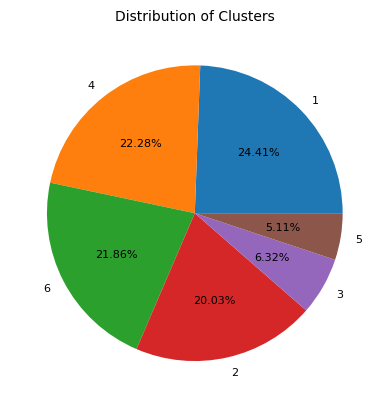

In [ ]:
def auto_fmt(pct_value):
    return '{:.2f}%'.format(pct_value)

df_transported_count = df['cluster_catgeory'].value_counts().rename_axis('cluster_catgeory').reset_index(name='Counts')

fig = plt.gcf()
plt.pie(x=df_transported_count['Counts'], labels=df_transported_count['cluster_catgeory'], autopct=auto_fmt, textprops={'fontsize': 8})
plt.title('Distribution of Clusters', fontsize=10)

let's explore the distributions of the luxury_sales, fresh_sales, dry_sales features using histograms and box plots. This will help us understand the spread, central tendency, and potential presence of outliers within these features.

We'll visualize:

1. Box plots to identify outliers and the interquartile range.

2. Histograms to see the distribution.(drawn in Feature Engineering section)

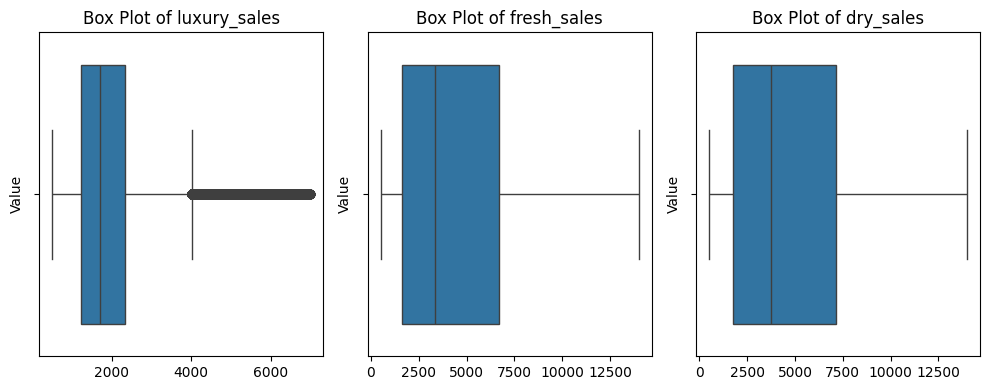

In [ ]:
features_to_plot = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Create box plots for sales
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

By visualizing box plots, tere're outliers present in luxury_sales.

##Handle Outliers

###Remove outliers from luxury_sales column

Removing outliers, using IQR method

In [ ]:
s_25 = np.quantile(df['luxury_sales'],0.25)
s_75 = np.quantile(df['luxury_sales'],0.75)
iqr = s_75 - s_25
s_lower = max(s_25 - 1.5*iqr, df['luxury_sales'].min())
s_upper = s_75 + 1.5 * iqr
df = df[(df['luxury_sales'] >= s_lower) & (df['luxury_sales'] <= s_upper)]

After handling outliers,

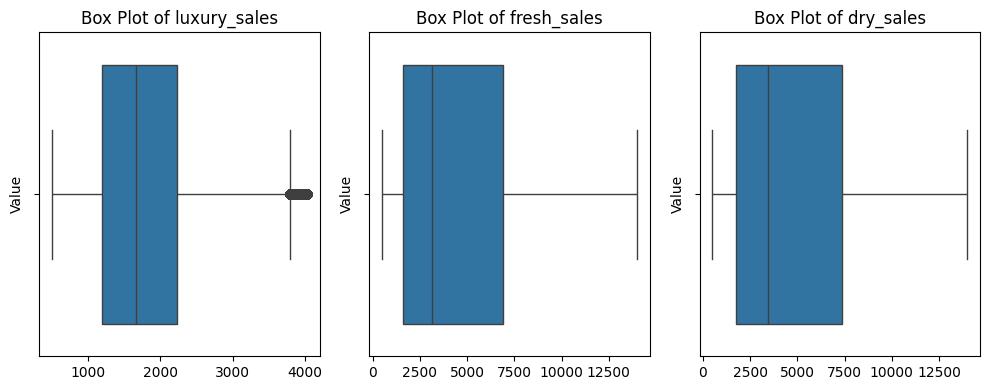

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

###Remove outliers from outlet_city column

In [ ]:
df.outlet_city.unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna',
       'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo',
       'Trincomalee', 'Kandy'], dtype=object)

Let's visualize how many customers are from each clustor category from each city.

In [ ]:
city_counts = df['outlet_city'].value_counts()

# Initialize dictionary to store counts
city_data = {city: np.zeros(6) for city in city_counts.index}

# Iterate through each city and count occurrences of each cluster category
for city in city_counts.index:
    counts = df[df['outlet_city'] == city]['cluster_catgeory'].value_counts().sort_index()
    city_data[city] = counts

# Create DataFrame from dictionary
new_df = pd.DataFrame.from_dict(city_data, orient='index').fillna(0)

# Rename index and columns for clarity
new_df.index.name = 'City'
new_df.columns = [f'Cluster {i}' for i in range(1, 7)]

new_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
City,,,,,,
Colombo,19018.0,2454.0,3.0,1.0,17044.0,0.0
Galle,19033.0,2435.0,0.0,2.0,17036.0,0.0
Batticaloa,18958.0,2383.0,0.0,2.0,17146.0,2.0
Kalmunai,18851.0,2359.0,0.0,1.0,17022.0,3.0
Jaffna,18821.0,2445.0,3.0,2.0,16939.0,2.0
Negombo,18847.0,2479.0,0.0,2.0,16880.0,2.0
Katunayake,19078.0,2322.0,0.0,2.0,16745.0,0.0
Kandy,18895.0,2383.0,2.0,0.0,16789.0,0.0
Trincomalee,18686.0,2406.0,1.0,3.0,16927.0,0.0


This data frame shows the presence of several cluster categories with number of customers less than 5. They are the fewer outliers present in outlet_city column. So I removed them from the dataset.

In [ ]:
for city in city_counts.index:
    # Filter DataFrame for current city
    d = df[df['outlet_city'] == city]

    # Group by cluster_category and transform to count occurrences
    counts = d.groupby('cluster_catgeory').transform('count')

    # Assign NaN to cluster_category where count is less than 5
    df.loc[df['outlet_city'] == city, 'cluster_catgeory'] = df.loc[df['outlet_city'] == city, 'cluster_catgeory'].where(counts['outlet_city'] >= 5, np.nan)

df

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,NaN
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0
...,...,...,...,...,...,...
774144,10672018.0,Galle,2695.45,2782.40,2608.50,3.0
774145,10764536.0,Colombo,1644.80,1593.40,1747.60,3.0
774146,10134170.0,Colombo,3796.80,3678.15,3915.45,3.0
774149,10204308.0,Katunayake,2389.76,2240.40,2613.80,3.0


Those identified customer's cluster_category is updated with NaN, Now we're gonna remove them from the data set.

In [ ]:
df.dropna(inplace=True, axis=0)

Let's check again the number of customers from each cluster category from each city.

In [ ]:
city_counts = df['outlet_city'].value_counts()

# Initialize dictionary to store counts
city_data = {city: np.zeros(6) for city in city_counts.index}

# Iterate through each city and count occurrences of each cluster category
for city in city_counts.index:
    counts = df[df['outlet_city'] == city]['cluster_catgeory'].value_counts().sort_index()
    city_data[city] = counts

# Create DataFrame from dictionary
new_df = pd.DataFrame.from_dict(city_data, orient='index').fillna(0)

# Rename index and columns for clarity
new_df.index.name = 'City'
new_df.columns = [f'Cluster {i}' for i in range(1, 7)]

new_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
City,,,,,,
Colombo,19018.0,2454.0,17044.0,0.0,0.0,0.0
Galle,19033.0,2435.0,17036.0,0.0,0.0,0.0
Batticaloa,18958.0,2383.0,17146.0,0.0,0.0,0.0
Kalmunai,18851.0,2359.0,17022.0,0.0,0.0,0.0
Negombo,18847.0,2479.0,16880.0,0.0,0.0,0.0
Jaffna,18821.0,2445.0,16939.0,0.0,0.0,0.0
Katunayake,19078.0,2322.0,16745.0,0.0,0.0,0.0
Kandy,18895.0,2383.0,16789.0,0.0,0.0,0.0
Trincomalee,18686.0,2406.0,16927.0,0.0,0.0,0.0


Useful insight- customers clustered under 1, 2, 3 are from these cities: Colombo, Galle, Batticaloa, Kalmunai, Jaffna, Negambo, Katunayake, Kandy, Trincomalee and Gampaha.
customers clustered under 4, 5, 6 are from these cities: Nuwara Eliya, Dehiwala, Kaduwela, Kotte, Panadura, Wattala, Homagama, Moratuwa, Kelaniya and Peliyagoda.

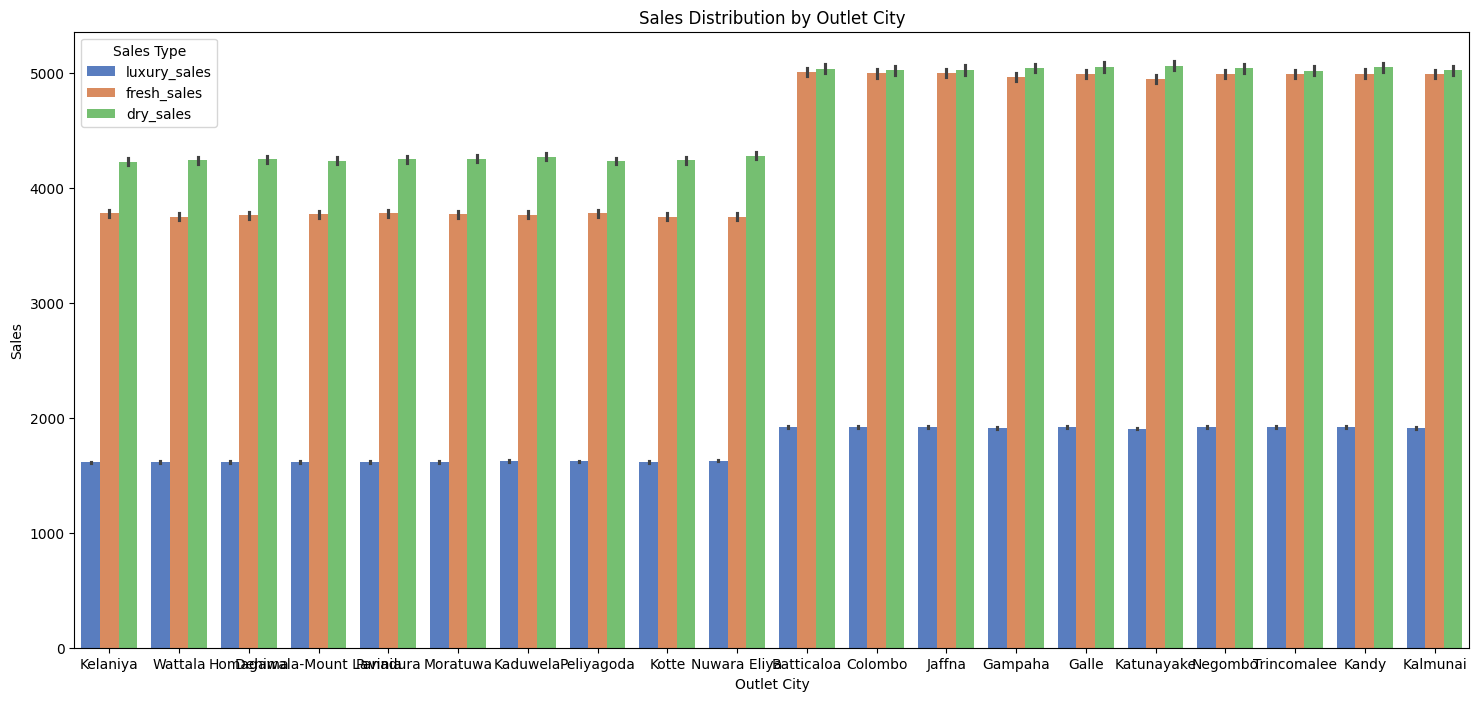

In [ ]:
# Melt the dataframe to reshape it for plotting
df_melted = pd.melt(df, id_vars=['outlet_city'], value_vars=['luxury_sales', 'fresh_sales', 'dry_sales'],
                    var_name='sales_type', value_name='sales')

plt.figure(figsize=(18, 8))
sns.barplot(x='outlet_city', y='sales', hue='sales_type', data=df_melted, palette='muted')

plt.title('Sales Distribution by Outlet City')
plt.xlabel('Outlet City')
plt.ylabel('Sales')
plt.grid(False)
plt.legend(title='Sales Type')
plt.show()

This graph illustartes that the outlet cities can be categorized into 2 groups such that the first 10 cities categorized into city_grp_1 and the rest categorized into city_grp_2.

In [ ]:
df.outlet_city.unique()

array(['Kelaniya', 'Wattala', 'Homagama', 'Dehiwala-Mount Lavinia',
       'Panadura', 'Moratuwa', 'Kaduwela', 'Peliyagoda', 'Kotte',
       'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna', 'Gampaha',
       'Galle', 'Katunayake', 'Negombo', 'Trincomalee', 'Kandy',
       'Kalmunai'], dtype=object)

In [ ]:
city_grp_1 = df.outlet_city.unique()[:10]
city_grp_2 = df.outlet_city.unique()[10:]

In [ ]:
df['city_type'] = df['outlet_city'].apply(lambda x: 1 if x in city_grp_1 else 0)

In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,city_type
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,1
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,1
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,1
5,10654823.0,Homagama,1661.00,913.55,5564.35,4.0,1


In [ ]:
df.tail()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,city_type
774144,10672018.0,Galle,2695.45,2782.40,2608.50,3.0,0
774145,10764536.0,Colombo,1644.80,1593.40,1747.60,3.0,0
774146,10134170.0,Colombo,3796.80,3678.15,3915.45,3.0,0
774149,10204308.0,Katunayake,2389.76,2240.40,2613.80,3.0,0
774150,10197979.0,Gampaha,3893.40,3893.40,3448.44,3.0,0


## Analysis on cluster target variable

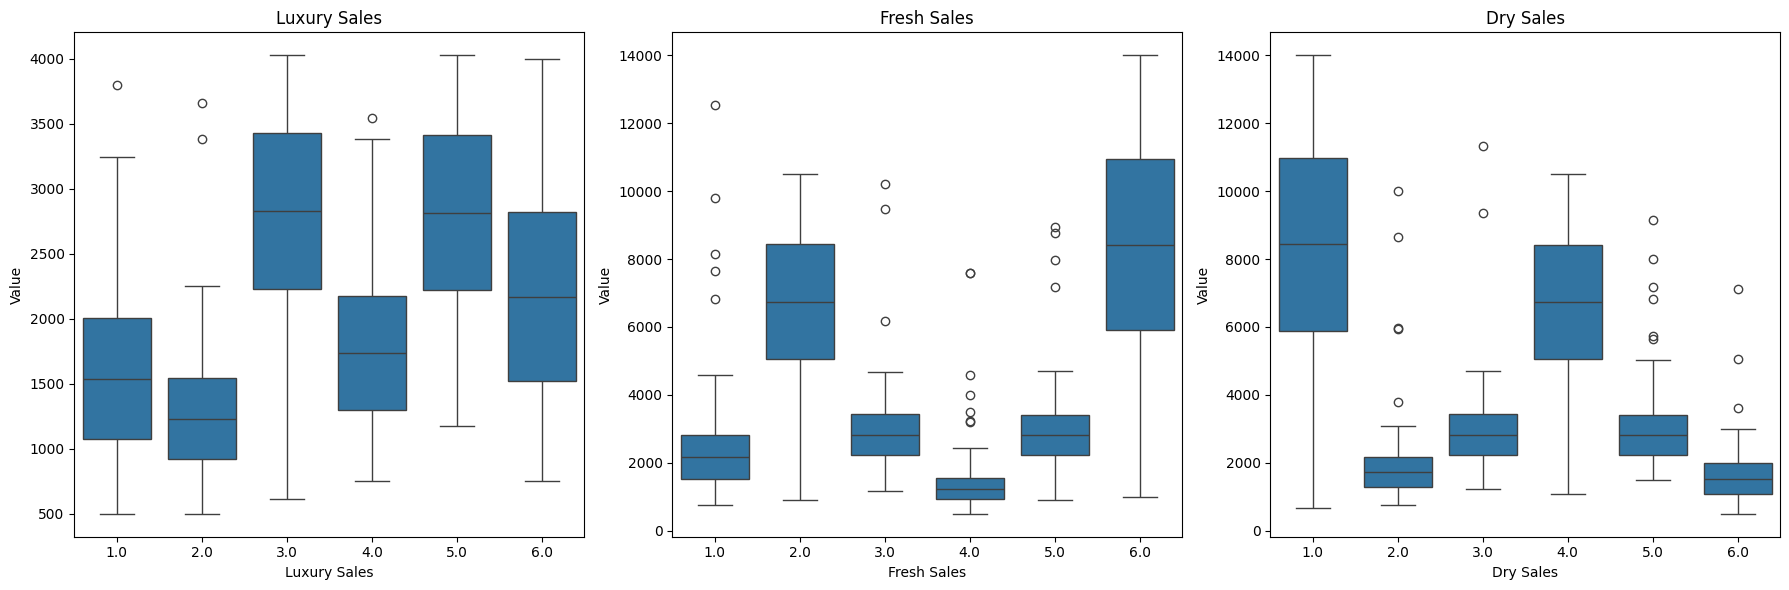

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(df, x='cluster_catgeory', y='luxury_sales', ax=axes[0])
axes[0].set_title('Luxury Sales')
axes[0].set_xlabel('Luxury Sales')
axes[0].set_ylabel('Value')

sns.boxplot(df, x='cluster_catgeory', y='fresh_sales', ax=axes[1])
axes[1].set_title('Fresh Sales')
axes[1].set_xlabel('Fresh Sales')
axes[1].set_ylabel('Value')

sns.boxplot(df, x='cluster_catgeory', y='dry_sales', ax=axes[2])
axes[2].set_title('Dry Sales')
axes[2].set_xlabel('Dry Sales')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Dry Sales')

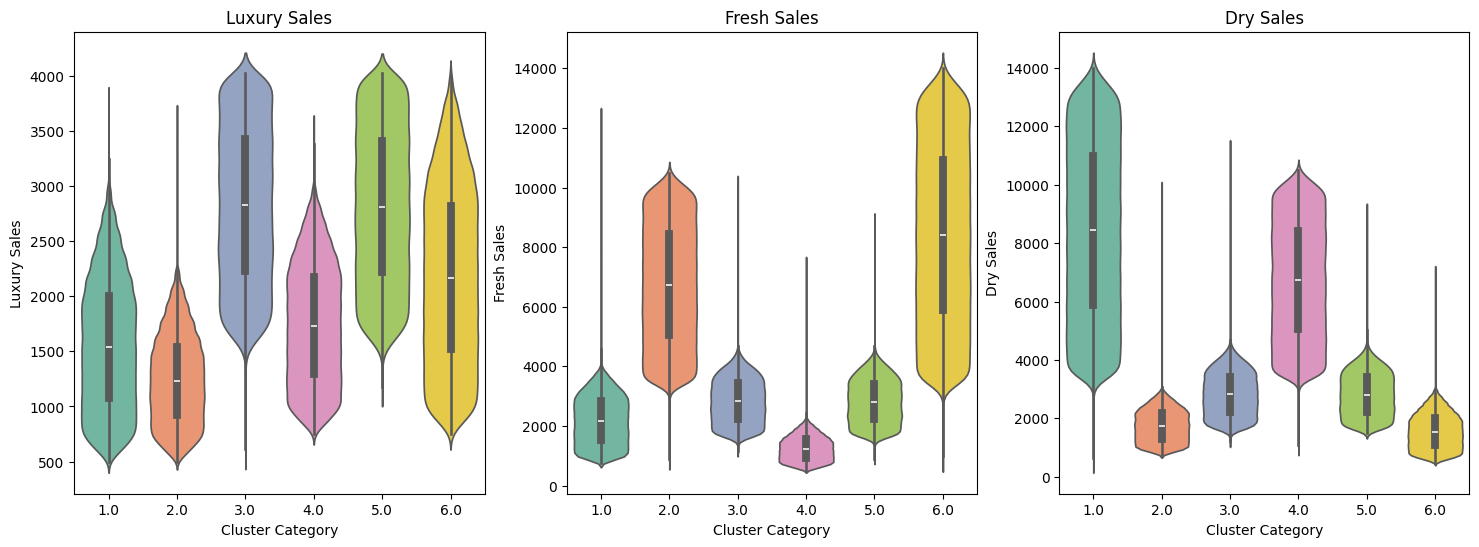

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(data=df, x='cluster_catgeory', y='luxury_sales', ax=axes[0], palette='Set2')
axes[0].set_title('Luxury Sales')
axes[0].set_xlabel('Cluster Category')
axes[0].set_ylabel('Luxury Sales')

sns.violinplot(data=df, x='cluster_catgeory', y='fresh_sales', ax=axes[1], palette='Set2')
axes[1].set_title('Fresh Sales')
axes[1].set_xlabel('Cluster Category')
axes[1].set_ylabel('Fresh Sales')

sns.violinplot(data=df, x='cluster_catgeory', y='dry_sales', ax=axes[2], palette='Set2')
axes[2].set_title('Dry Sales')
axes[2].set_xlabel('Cluster Category')
axes[2].set_ylabel('Dry Sales')

Text(0, 0.5, 'Dry Sales')

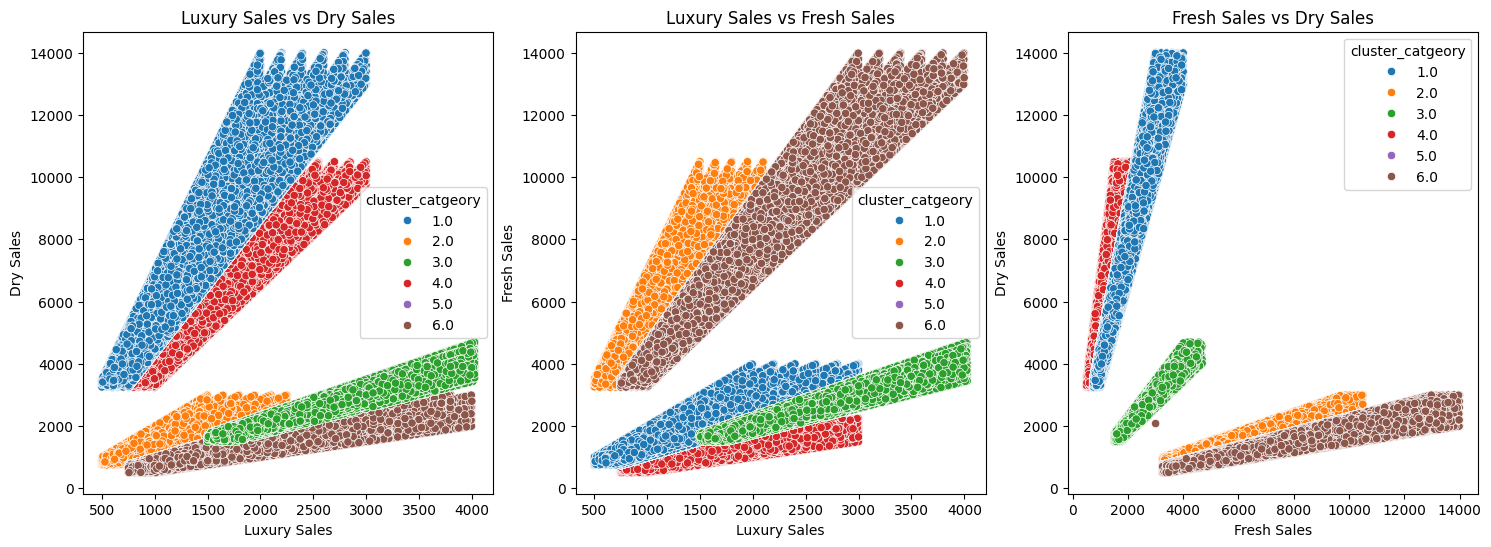

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df, x='luxury_sales', y='dry_sales', hue='cluster_catgeory', ax=axes[0], palette='tab10')
axes[0].set_title('Luxury Sales vs Dry Sales')
axes[0].set_xlabel('Luxury Sales')
axes[0].set_ylabel('Dry Sales')

sns.scatterplot(data=df, x='luxury_sales', y='fresh_sales', hue='cluster_catgeory', ax=axes[1], palette='tab10')
axes[1].set_title('Luxury Sales vs Fresh Sales')
axes[1].set_xlabel('Luxury Sales')
axes[1].set_ylabel('Fresh Sales')

sns.scatterplot(data=df, x='fresh_sales', y='dry_sales', hue='cluster_catgeory', ax=axes[2], palette='tab10')
axes[2].set_title('Fresh Sales vs Dry Sales')
axes[2].set_xlabel('Fresh Sales')
axes[2].set_ylabel('Dry Sales')

#Feature Engineering

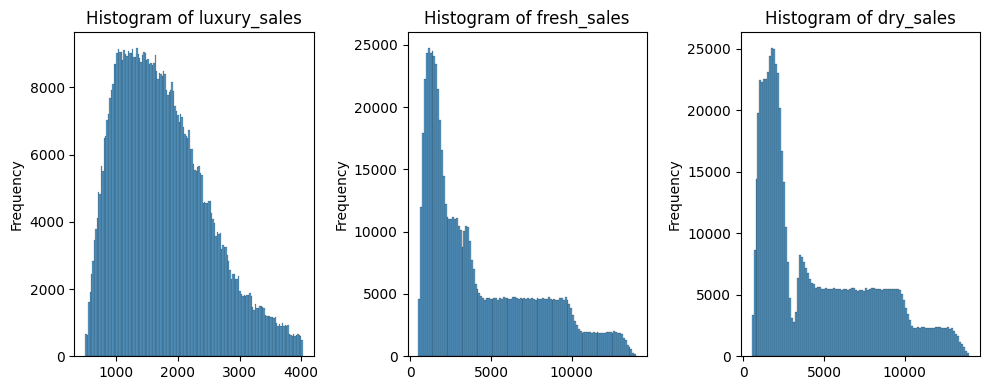

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Create histograms for sales
for i, feature in enumerate(features_to_plot):
    sns.histplot(x=df[feature], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Create new features

Let's apply log scaling to obtain near normal distribution in sales.

In [ ]:
df['log_luxury'] = np.log(df['luxury_sales'])
df['log_fresh'] = np.log(df['fresh_sales'])
df['log_dry'] = np.log(df['dry_sales'])

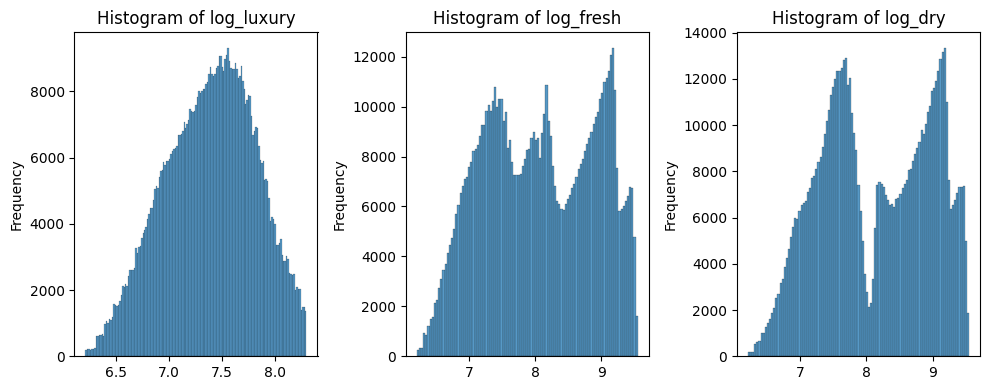

In [ ]:
features_to_plot = ['log_luxury', 'log_fresh', 'log_dry']

# Create histograms for the log sales
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, feature in enumerate(features_to_plot):
    sns.histplot(x=df[feature], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df['luxury_fresh_ratio'] = df['luxury_sales'] / df['fresh_sales']
df['luxury_dry_ratio'] = df['luxury_sales'] / df['dry_sales']
df['fresh_dry_ratio'] = df['fresh_sales'] / df['dry_sales']

In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,city_type,log_luxury,log_fresh,log_dry,luxury_fresh_ratio,luxury_dry_ratio,fresh_dry_ratio
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,1,7.098045,6.628041,8.573952,1.600000,0.228571,0.142857
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,1,7.735818,7.300500,9.122112,1.545455,0.250000,0.161765
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,1,7.729709,7.461445,9.116003,1.307692,0.250000,0.191176
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,1,7.760250,7.635086,9.131729,1.133333,0.253731,0.223881
5,10654823.0,Homagama,1661.00,913.55,5564.35,4.0,1,7.415175,6.817338,8.624135,1.818182,0.298507,0.164179


In [ ]:
df.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,city_type,log_luxury,log_fresh,log_dry,luxury_fresh_ratio,luxury_dry_ratio,fresh_dry_ratio
count,7.389240e+05,738924.000000,738924.000000,738924.000000,738924.000000,738924.000000,738924.000000,738924.000000,738924.000000,738924.000000,738924.000000,738924.000000
mean,1.038709e+07,1773.767586,4400.456456,4659.960652,3.278213,0.482737,7.392411,8.065470,8.134941,0.685758,0.656151,2.250978
std,2.234929e+05,738.474756,3406.220714,3484.561290,1.899363,0.499702,0.428237,0.834249,0.822097,0.491352,0.499637,2.279645
min,1.000000e+07,500.000000,500.000000,500.000000,1.000000,0.000000,6.214608,6.214608,6.214608,0.142857,0.142857,0.142857
25%,1.019351e+07,1191.680000,1576.820000,1744.430000,1.000000,0.000000,7.083119,7.363165,7.464183,0.235294,0.220588,0.227273
50%,1.038713e+07,1667.160000,3137.180000,3465.280000,4.000000,0.000000,7.418877,8.051080,8.150549,0.631579,0.555556,0.939394
75%,1.058067e+07,2232.300000,6877.230000,7365.080000,5.000000,1.000000,7.710788,8.835971,8.904505,1.032258,1.031250,4.333333
max,1.077416e+07,4026.400000,13997.900000,13999.300000,6.000000,1.000000,8.300628,9.546663,9.546763,2.000000,2.000000,7.000000


Let's apply min_max scaling

In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df[['log_luxury', 'log_fresh', 'log_dry', 'luxury_fresh_ratio', 'luxury_dry_ratio', 'fresh_dry_ratio']])
scaled_train_df = pd.DataFrame(scaled_train, columns=['log_luxury_scaled', 'log_fresh_scaled', 'log_dry_scaled', 'luxury_fresh_ratio_scaled', 'luxury_dry_ratio_scaled', 'fresh_dry_ratio_scaled'])
scaled_train_df.head()

,log_luxury_scaled,log_fresh_scaled,log_dry_scaled,luxury_fresh_ratio_scaled,luxury_dry_ratio_scaled,fresh_dry_ratio_scaled
0,0.423504,0.124078,0.708053,0.784615,0.046154,3.469447e-18
1,0.729240,0.325893,0.872560,0.755245,0.057692,2.757353e-03
2,0.726312,0.374195,0.870726,0.627219,0.057692,7.046569e-03
3,0.740952,0.426307,0.875446,0.533333,0.059701,1.181592e-02
4,0.575530,0.180888,0.723114,0.902098,0.083812,3.109453e-03


In [ ]:
print(df.columns)
print(scaled_train_df.columns)

Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory', 'city_type', 'log_luxury', 'log_fresh',
       'log_dry', 'luxury_fresh_ratio', 'luxury_dry_ratio', 'fresh_dry_ratio'],
      dtype='object')
Index(['log_luxury_scaled', 'log_fresh_scaled', 'log_dry_scaled',
       'luxury_fresh_ratio_scaled', 'luxury_dry_ratio_scaled',
       'fresh_dry_ratio_scaled'],
      dtype='object')


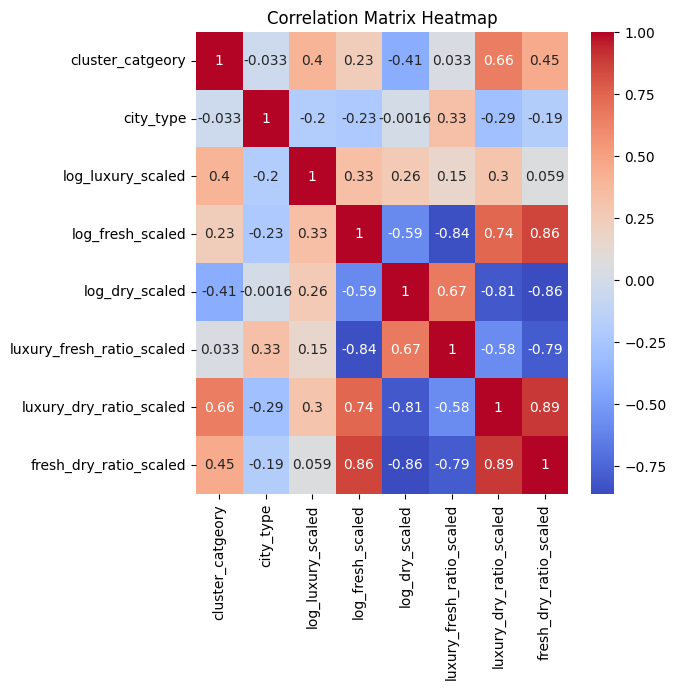

In [ ]:
columns_to_concat = ['log_luxury_scaled', 'log_fresh_scaled', 'log_dry_scaled',
       'luxury_fresh_ratio_scaled', 'luxury_dry_ratio_scaled',
       'fresh_dry_ratio_scaled']

df1 = pd.concat([df[['cluster_catgeory', 'city_type']], scaled_train_df[columns_to_concat]], axis=1)
corr_matrix = df1.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
cl1 = ['log_luxury_scaled', 'log_fresh_scaled', 'log_dry_scaled']
cl2 = ['luxury_fresh_ratio_scaled', 'luxury_dry_ratio_scaled', 'fresh_dry_ratio_scaled']

In [ ]:
df2 = pd.concat([df[['city_type']], scaled_train_df[cl1], df['cluster_catgeory']], axis=1)
df3 = pd.concat([df[['city_type']], scaled_train_df[cl2], df['cluster_catgeory']], axis=1)

In [ ]:
y = df2['cluster_catgeory']
X = df2.drop(columns=['cluster_catgeory'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training

credits: https://www.kaggle.com/code/akinduhiman/cluster-category-prediction-datastorm-5-0


Let's build a RandomForest model to predict customer cluster categories using sales data and city information.

##Convert data to TensorFlow datasets

We convert the Pandas dataframes into TensorFlow datasets, which are required for training the TensorFlow Decision Forests model.

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 663.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 30.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Succes

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
label='cluster_catgeory'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, y_train], axis=1), label=label, task=tfdf.keras.Task.CLASSIFICATION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, y_test], axis=1), label=label, task=tfdf.keras.Task.CLASSIFICATION)

##Build and compile the Random Forest model


We use TensorFlow Decision Forests to build a Random Forest model for classification. The model is compiled with accuracy as the evaluation metric.

In [ ]:
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)
model.compile(metrics=["accuracy"])

Use /tmp/tmpy_hv0f27 as temporary training directory


In [ ]:
model.fit(x=train_ds)

##Visualize the model


To understand the decision-making process of the Random Forest, we visualize one of the trees in the forest.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

##Evaluate the model


We evaluate the model's performance on the test dataset.

In [ ]:
evaluation = model.evaluate(test_ds, return_dict=True)

148/148 [==============================] - 6s 39ms/step - loss: 0.0000e+00 - accuracy: 0.9999


##Make predictions

The model is used to make predictions on the test dataset.

In [ ]:
y_pred = model.predict(test_ds)

148/148 [==============================] - 10s 65ms/step


In [ ]:
y_pred_rounded = tf.cast(tf.round(y_pred), tf.int32)

In [ ]:
y_pred = tf.argmax(y_pred_rounded, axis=1)

In [ ]:
y_pred

<tf.Tensor: shape=(147786,), dtype=int64, numpy=array([1, 4, 6, ..., 2, 4, 2])>

##Calculate and display accuracy


We calculate the accuracy of the model's predictions on the test dataset and display it.

In [ ]:
from sklearn.metrics import accuracy_score
print('*'*20)
print('Accuracy  :',np.round(accuracy_score(y_test, y_pred)*100,2),'%')
print('*'*20)

********************
Accuracy  : 99.99 %
********************


In [ ]:
# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('*'*40)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print('*'*40)

****************************************
Mean Squared Error: 0.0007172533257548076
Mean Absolute Error: 0.00018946314265221332
R-squared: 0.9998012324957259
****************************************
